In [5]:
import numpy as np

In [1]:
import pandas as pd

In [29]:
import matplotlib.pyplot as plt

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

import data

In [12]:
spam_df = pd.read_csv('C:\\Users\\esrab\\OneDrive\\Documents\\portfolio\\P74-Project-6\\Project 6\\emails.csv')

In [13]:
spam_df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [15]:
spam_df.head(5)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [16]:
spam_df.tail(5)

,text,spam
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0
5727,Subject: news : aurora 5 . 2 update aurora ve...,0


In [17]:
spam_df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [18]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


Visualise the dataset:

In [19]:
ham = spam_df[spam_df['spam']== 0]

In [20]:
ham

,text,spam
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0
1369,Subject: sacramento weather station fyi - - ...,0
1370,Subject: from the enron india newsdesk - jan 1...,0
1371,Subject: re : powerisk 2001 - your invitation ...,0
1372,Subject: re : resco database and customer capt...,0
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [21]:
spam = spam_df[spam_df['spam']== 1]

In [22]:
spam

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
1363,Subject: are you ready to get it ? hello ! v...,1
1364,Subject: would you like a $ 250 gas card ? do...,1
1365,"Subject: immediate reply needed dear sir , i...",1
1366,Subject: wanna see me get fisted ? fist bang...,1


In [23]:
print('spam persentag =',(len(spam)/len(spam_df))*100,'%')

spam persentag = 23.88268156424581 %


In [24]:
print('ham persentag =',(len(ham)/len(spam_df))*100,'%')

ham persentag = 76.11731843575419 %


<Axes: ylabel='count'>

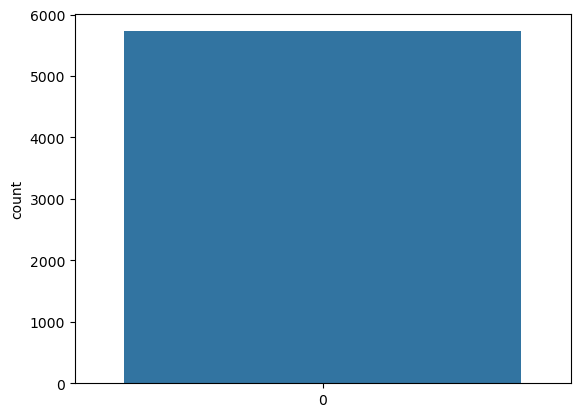

In [30]:
sns.countplot(spam_df['spam'], label = 'count Spam vs. ham')

<Axes: xlabel='spam', ylabel='count'>

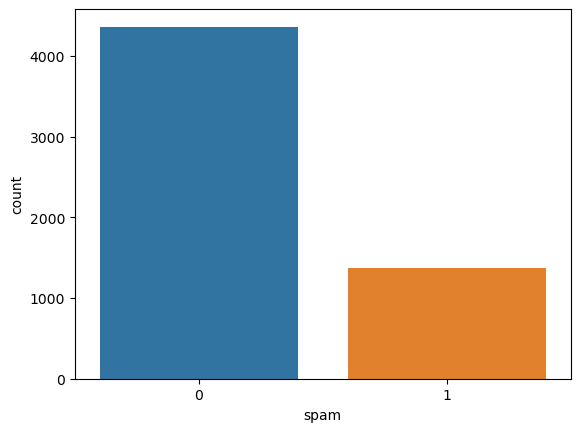

In [31]:
sns.countplot(x='spam', data=spam_df)

Create testing and training:
count vectorizer 

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
spamham_countvectorizer = vectorizer.fit_transform(spam_df['text'])

In [36]:
print(vectorizer.get_feature_names_out())

['00' '000' '0000' ... 'zzn' 'zzncacst' 'zzzz']


In [37]:
print (spamham_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [38]:
spamham_countvectorizer.shape

(5728, 37303)

Traning the Model:

In [40]:
label= spam_df['spam'].values

In [41]:
label

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [45]:
from sklearn.naive_bayes import MultinomialNB

# Create a Multinomial Naive Bayes classifier
NB_classifier = MultinomialNB()

# Train the classifier using the count vectorizer matrix (spamham_countvectorizer) and labels (assuming they are in a variable called 'y')
NB_classifier.fit(spamham_countvectorizer, label)


MultinomialNB()

In [46]:
testing_sample = ['Did you already talk to one of our recruiters?','free cash to your bank!']
testing_sample_countvectorizer = vectorizer.transform(testing_sample)

In [47]:
test_predict = NB_classifier.predict(testing_sample_countvectorizer)

In [48]:
test_predict

array([0, 1], dtype=int64)

Divide data into training and testing:

In [49]:
x= spamham_countvectorizer
y= label

In [50]:
x.shape

(5728, 37303)

In [51]:
y.shape

(5728,)

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_text, y_train, y_test = train_test_split(x,y, test_size = 0.2)

In [53]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()

NB_classifier.fit(x_train, y_train)


MultinomialNB()

Evaluatite the model:

In [54]:
from sklearn.metrics import classification_report, confusion_matrix
    

In [70]:
y_predict_train = NB_classifier.predict(x_train)

In [71]:
y_predict_train

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

<Axes: >

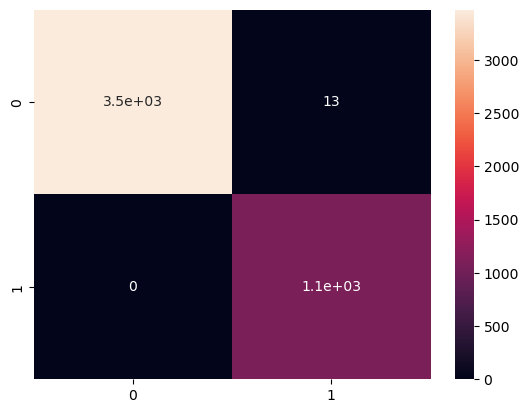

In [72]:
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot = True)

In [74]:
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm , annot = True)

NameError: name 'X_test' is not defined

In [69]:

# Use the trained classifier to make predictions
y_predict_test = NB_classifier.predict(x_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_predict_test)

NameError: name 'x_test' is not defined

In [62]:
y_predict_test = NB_classifier.predict(x_train)

<Axes: >

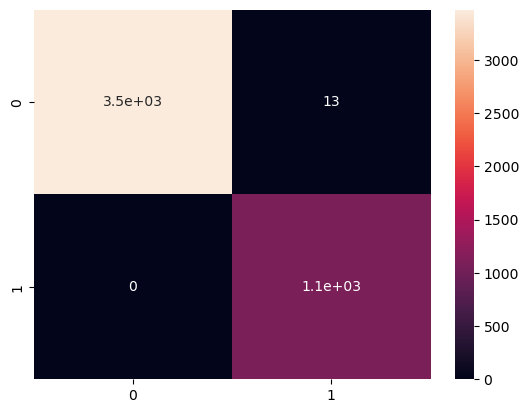

In [63]:
sns.heatmap(cm , annot = True)

In [67]:
print(len(y_test))
print(len(y_predict_test))

1146
4582


In [76]:
print(classification_report(y_test, y_predict_test))

ValueError: Found input variables with inconsistent numbers of samples: [1146, 4582]